In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import  fft, ifft, fftshift, fftfreq 
import soundfile as sf
import sounddevice as sd


from IPython.display import Audio

## A. Discrete Fourier Transform and Zero Padding

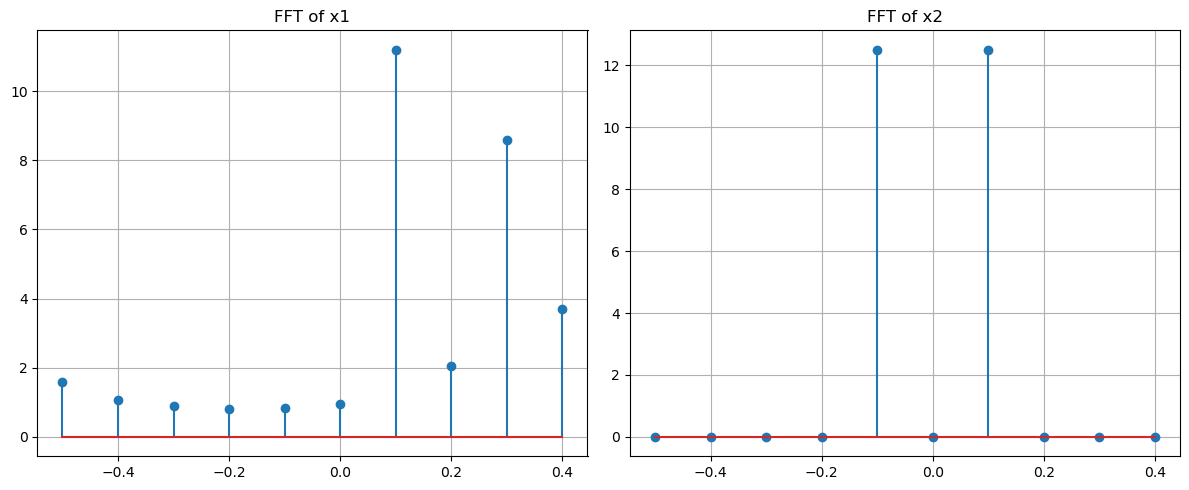

In [39]:
## Part 1
N = 10 # Number of samples
n = np.arange(N)

x1 = np.exp(1j*2*np.pi*n*(10*(1))/100) + np.exp(1j*2*np.pi*n*33/100)

x2 = 2*np.cos(2*np.pi*n*(10*(1))/100) + 0.5*np.cos(2*np.pi*n*(10*(8+1))/100)

X1 = fft(x1, N)
X2 = fft(x2, N)

X1_shift = fftshift(X1)
X2_shift = fftshift(X2)

# Frequency axis
fr = fftshift(fftfreq(N, d=1))

# Plotting signals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(fr, np.abs(X1_shift))
plt.title('FFT of x1')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(fr, np.abs(X2_shift))
plt.title('FFT of x2')
plt.grid(True)

plt.tight_layout()
plt.show()





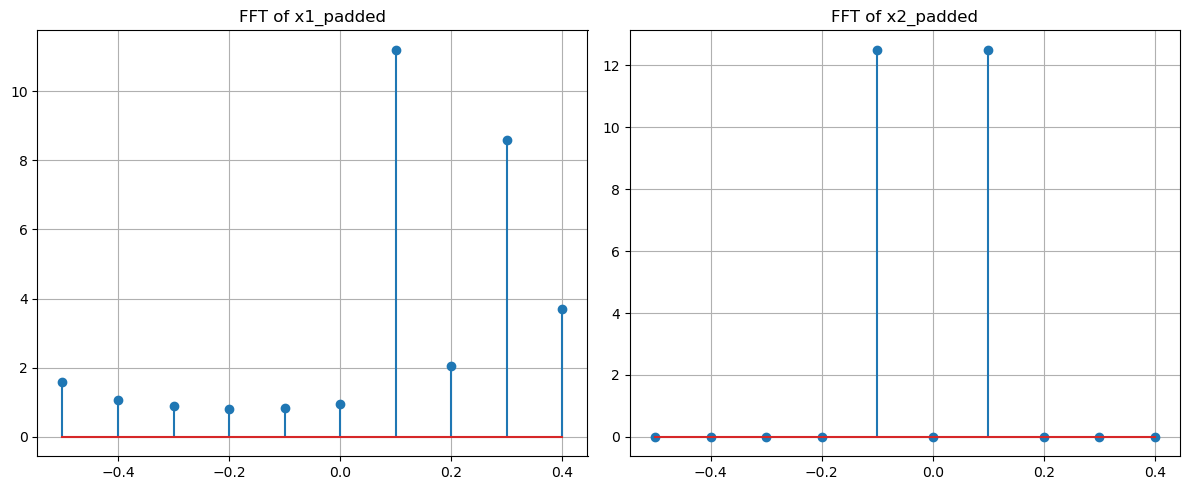

In [40]:
## Part 2

N = 10 # Number of samples
n = np.arange(N)
padding = 500

x1 = np.exp(1j*2*np.pi*n*(10*(1))/100) + np.exp(1j*2*np.pi*n*33/100)

x2 = 2*np.cos(2*np.pi*n*(10*(1))/100) + 0.5*np.cos(2*np.pi*n*(10*(8+1))/100)



x1_padded = np.pad(x1, (0, padding - len(x1),), mode='constant')
x2_padded = np.pad(x2, (0, padding - len(x2),), mode='constant')

X1_padded = fft(x1_padded, N)
X2_padded = fft(x2_padded, N)

X1_padded_shift = fftshift(X1_padded)
X2_padded_shift = fftshift(X2_padded)

# Frequency axis
fr = fftshift(fftfreq(N, d=1))

# Plotting signals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(fr, np.abs(X1_padded_shift))
plt.title('FFT of x1_padded')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(fr, np.abs(X2_padded_shift))
plt.title('FFT of x2_padded')
plt.grid(True)

plt.tight_layout()
plt.show()



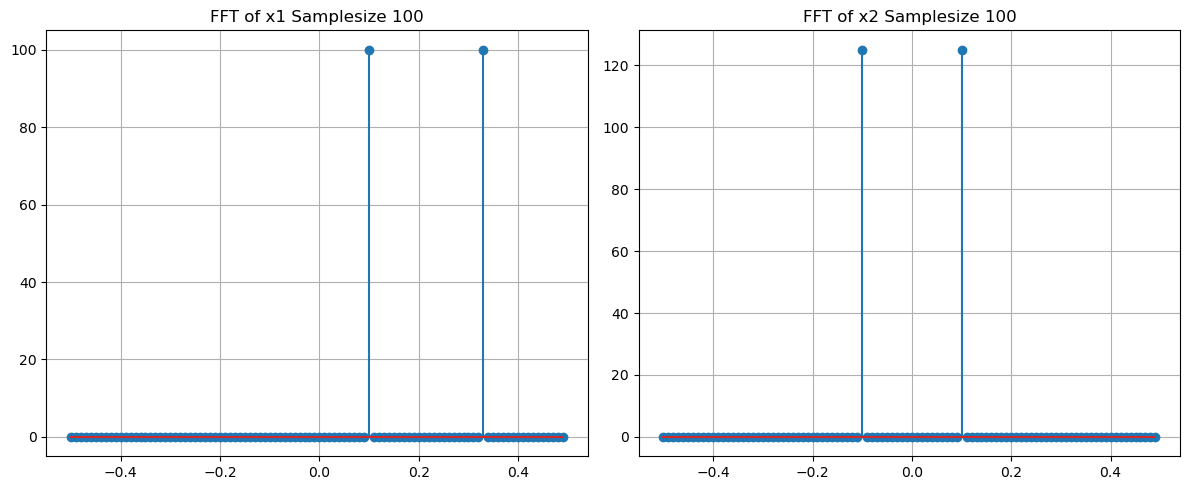

In [41]:
## Part 3
N = 100 # Number of samples
n = np.arange(N)

x1 = np.exp(1j*2*np.pi*n*(10*(1))/100) + np.exp(1j*2*np.pi*n*33/100)

x2 = 2*np.cos(2*np.pi*n*(10*(1))/100) + 0.5*np.cos(2*np.pi*n*(10*(8+1))/100)

X1 = fft(x1, N)
X2 = fft(x2, N)

X1_shift = fftshift(X1)
X2_shift = fftshift(X2)

# Frequency axis
fr = fftshift(fftfreq(N, d=1))

# Plotting signals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(fr, np.abs(X1_shift))
plt.title('FFT of x1 Samplesize 100')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(fr, np.abs(X2_shift))
plt.title('FFT of x2 Samplesize 100')
plt.grid(True)

plt.tight_layout()
plt.show()

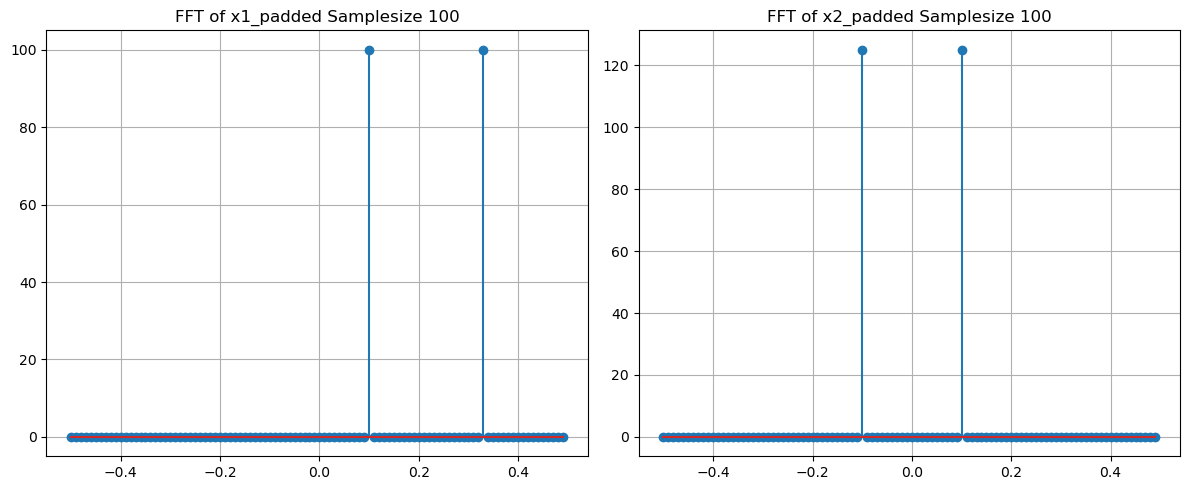

In [42]:
## Part 4

N = 100 # Number of samples
n = np.arange(N)
padding = 500

x1 = np.exp(1j*2*np.pi*n*(10*(1))/100) + np.exp(1j*2*np.pi*n*33/100)

x2 = 2*np.cos(2*np.pi*n*(10*(1))/100) + 0.5*np.cos(2*np.pi*n*(10*(8+1))/100)



x1_padded = np.pad(x1, (0, padding - len(x1),), mode='constant')
x2_padded = np.pad(x2, (0, padding - len(x2),), mode='constant')

X1_padded = fft(x1_padded, N)
X2_padded = fft(x2_padded, N)

X1_padded_shift = fftshift(X1_padded)
X2_padded_shift = fftshift(X2_padded)

# Frequency axis
fr = fftshift(fftfreq(N, d=1))

# Plotting signals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.stem(fr, np.abs(X1_padded_shift))
plt.title('FFT of x1_padded Samplesize 100')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(fr, np.abs(X2_padded_shift))
plt.title('FFT of x2_padded Samplesize 100')
plt.grid(True)

plt.tight_layout()
plt.show()

## B. Sampling

In [43]:
## Part 1

audio = 'media/example.wav'

y, fs = sf.read(audio)

N_0 = len(y) # Number of samples
T_0 = N_0 / fs # Duration of the signal
T = 1 / fs # Sampling period

print(f"Number of samples: {N_0}")
print(f"Duration of the signal: {T_0:.2f} seconds")
print(f"Sampling period: {T:.10f} seconds")



Number of samples: 262094
Duration of the signal: 5.94 seconds
Sampling period: 0.0000226757 seconds


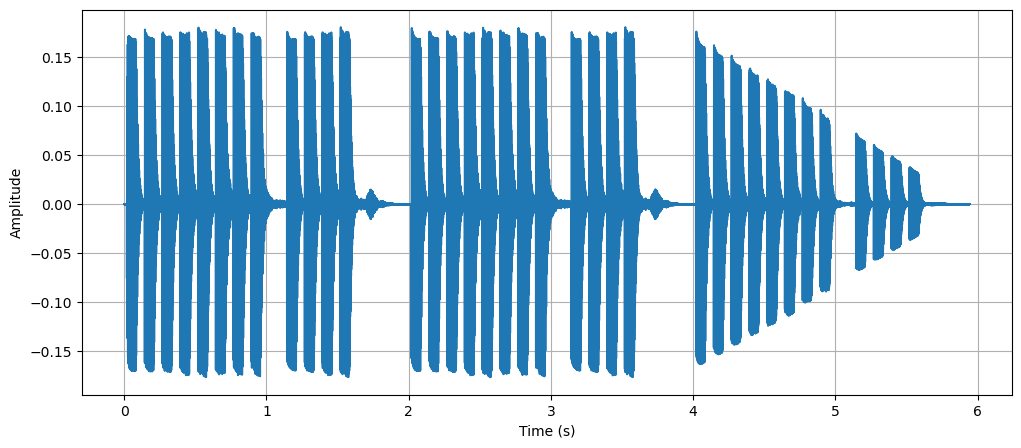

In [44]:
## Part 2

t = np.arange(0, T_0, T) # Time vector
y_new = y[:, 0] # Take only one channel if stereo

plt.figure(figsize=(12, 5))
plt.plot(t, y_new)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

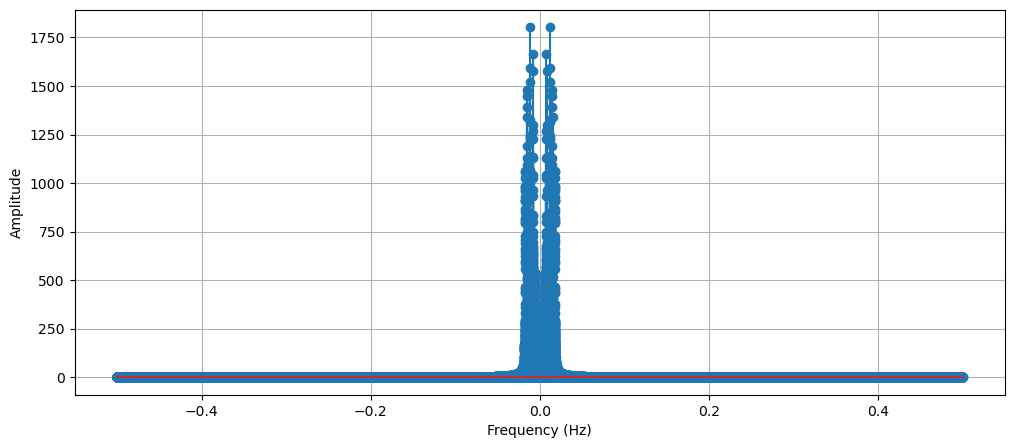

In [45]:
## Part 3

Y = fft(y_new, N_0)
Y_shift = fftshift(Y)

fr = fftshift(fftfreq(N_0, d=1))

plt.figure(figsize=(12, 5))
plt.stem(fr, np.abs(Y_shift))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [46]:
## part 4

y1 = y[::2] # subsample by 2

N_1 = len(y1) # Number of samples
T_1 = len(y) / fs # Still original duration
T = 1 / (fs / 2) # New sampling period

print(f"Number of samples: {N_1}")
print(f"Duration of the signal: {T_1:.2f} seconds")
print(f"Sampling period: {T:.10f} seconds")





Number of samples: 131047
Duration of the signal: 5.94 seconds
Sampling period: 0.0000453515 seconds


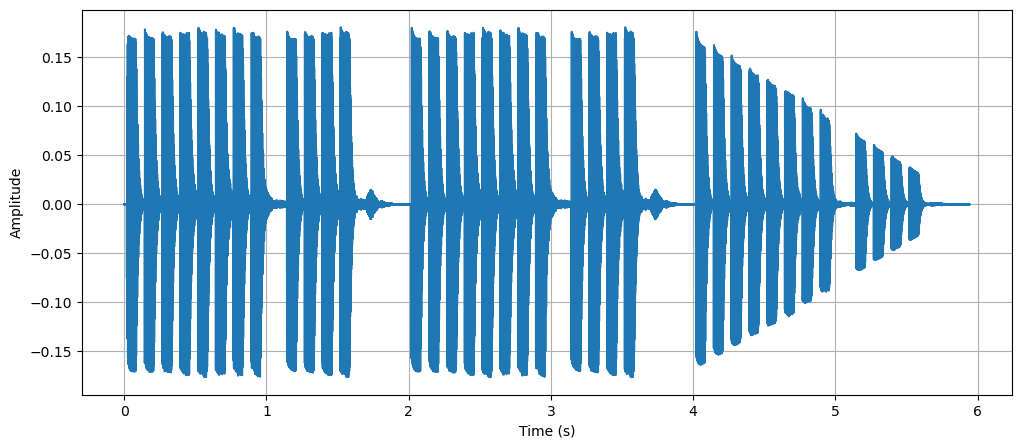

In [47]:
## Part 5

t1 = np.arange(0, T_1, T) # Time vector
y1_new = y1[:, 0] # Take only one channel if stereo

plt.figure(figsize=(12, 5))
plt.plot(t1, y1_new)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

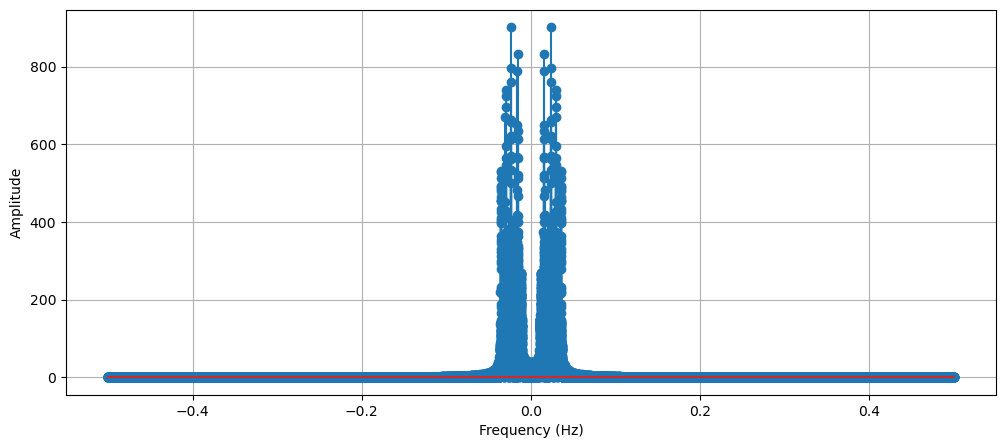

In [48]:
## Part 6

Y1 = fft(y1_new, N_1)
Y1_shift = fftshift(Y1)

fr = fftshift(fftfreq(N_1, d=1))

plt.figure(figsize=(12, 5))
plt.stem(fr, np.abs(Y1_shift))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
## Part 7

# Testing the Audio playback

sd.play(y, fs)

In [54]:
sd.play(y1_new, fs)

Number of samples: 52419
Duration of the signal: 5.94 seconds
Sampling period: 0.0001133787 seconds


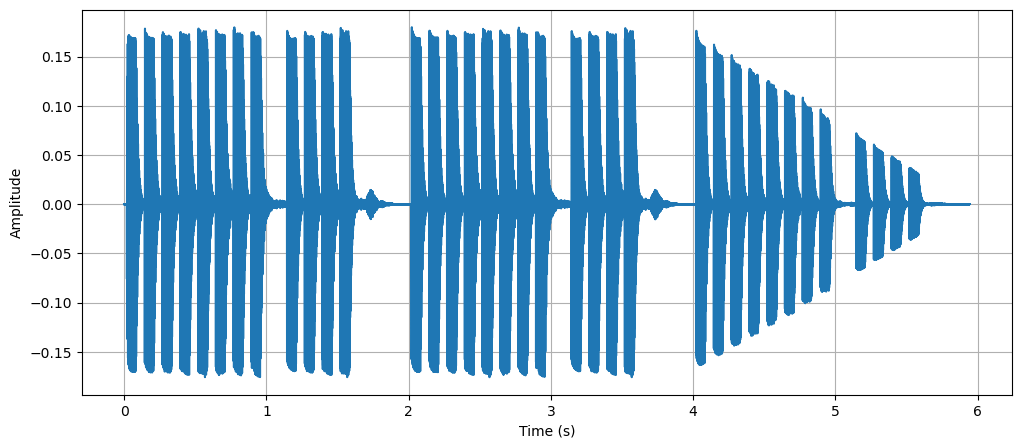

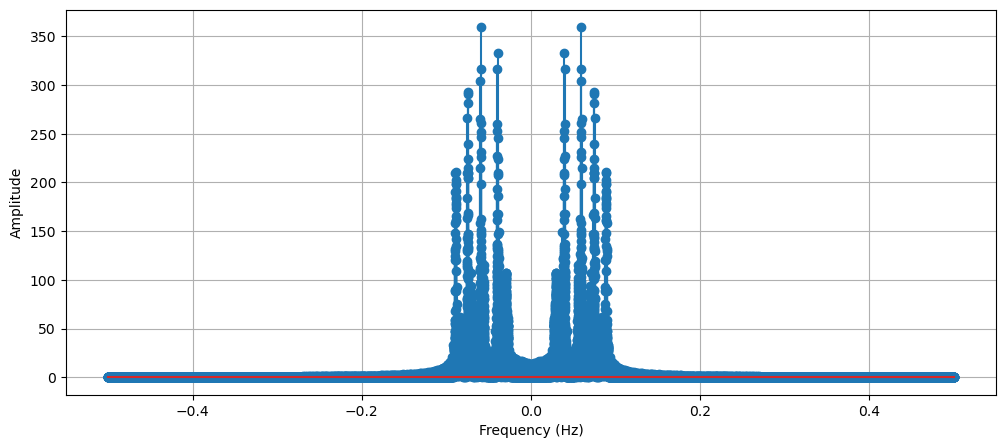

In [51]:
## Part 8

y2 = y[::5] # subsample by 5

N_2 = len(y2) # Number of samples
T_2 = len(y) / fs # Still original duration
T = 1 / (fs / 5) # New sampling period

print(f"Number of samples: {N_2}")
print(f"Duration of the signal: {T_2:.2f} seconds")
print(f"Sampling period: {T:.10f} seconds")


t2 = np.arange(0, T_2, T) # Time vector
y2_new = y2[:, 0] # Take only one channel if stereo

plt.figure(figsize=(12, 5))
plt.plot(t2, y2_new)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Y2 = fft(y2_new, N_2)
Y2_shift = fftshift(Y2)

fr = fftshift(fftfreq(N_2, d=1))

plt.figure(figsize=(12, 5))
plt.stem(fr, np.abs(Y2_shift))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [52]:
sd.play(y2, fs)